<a href="https://colab.research.google.com/github/SilverSurferClash/Kaggle_Aug_July_22/blob/main/August_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#Models

import xgboost as xgb
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#Feature engineerring
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

#Splitting the data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

#time
import time

# Hyperparameter optimization

#import optuna

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.9 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2


# Neuer Abschnitt

In [3]:
!pip install -U Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [4]:
from pycaret.classification import *

In [5]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c tabular-playground-series-aug-2022

tabular-playground-series-aug-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import os

In [22]:
os.getcwd()

'/content'

In [24]:
ls

kaggle.json   sample_submission.csv                   train.csv
logs.log      tabular-playground-series-aug-2022.zip
sample_data/  test.csv


In [21]:
!cd ..

In [18]:
! unzip "tabular-playground-series-aug-2022.zip"

Archive:  tabular-playground-series-aug-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [16]:
from pathlib import Path
import sys

In [25]:
working_dir = "/content"
data_dir = Path(working_dir)

In [26]:
train_import = pd.read_csv(data_dir / "train.csv", index_col="id")
test_import = pd.read_csv(data_dir / "test.csv", index_col="id")
submission_df = pd.read_csv(data_dir / "sample_submission.csv")

In [27]:
#Set up Pycaret
s = setup(train_import, target = 'failure')

,Description,Value
0,session_id,2743
1,Target,failure
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26570, 25)"
5,Missing Values,True
6,Numeric Features,19
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='failure',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [31]:
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7894,0.5851,0.0036,0.3600,0.0071,0.0032,0.0176,0.111
lr,Logistic Regression,0.7895,0.5844,0.0023,0.2617,0.0046,0.0018,0.0096,1.029
gbc,Gradient Boosting Classifier,0.7891,0.5757,0.0031,0.2933,0.0061,0.0018,0.0108,7.524
nb,Naive Bayes,0.7844,0.5711,0.0320,0.3550,0.0586,0.0248,0.0493,0.041
ada,Ada Boost Classifier,0.7891,0.5656,0.0051,0.3594,0.0100,0.0042,0.0216,1.590
lightgbm,Light Gradient Boosting Machine,0.7887,0.5494,0.0051,0.2984,0.0100,0.0034,0.0140,0.491
rf,Random Forest Classifier,0.7898,0.5483,0.0018,0.2429,0.0035,0.0017,0.0095,7.066
et,Extra Trees Classifier,0.7896,0.5383,0.0000,0.0000,0.0000,-0.0006,-0.0065,2.507
knn,K Neighbors Classifier,0.7545,0.5258,0.0878,0.2557,0.1305,0.0259,0.0310,0.327
dt,Decision Tree Classifier,0.6637,0.5107,0.2467,0.2255,0.2355,0.0206,0.0207,0.549


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [29]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DummyClassifier(constant=None, random_state=2743, strategy='prior'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

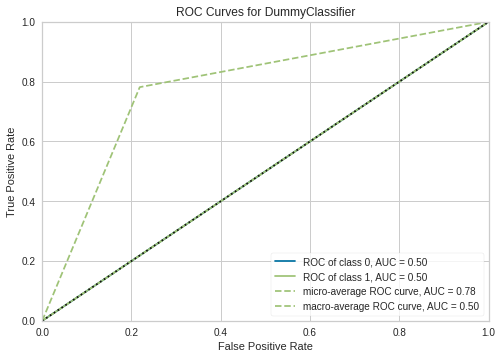

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(best, plot = 'auc')